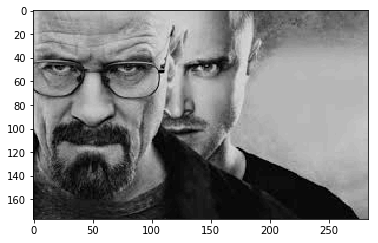

In [69]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2
def img_quantization(l,img_array):


    fmin = 0
    fmax = 256
    q = fmax/l

    img_array_ = np.floor(img_array/q)
    img_array_*= q
    img_array_+=q/2
    img_array_+=fmin
    img_array_ = img_array_.astype('uint8') 
    
    return img_array_
    

img = Image.open('download.jpg')
img_array= np.asarray(img)
a=img_quantization(64,img_array)
image2 = Image.fromarray(a)
plt.imshow(image2)


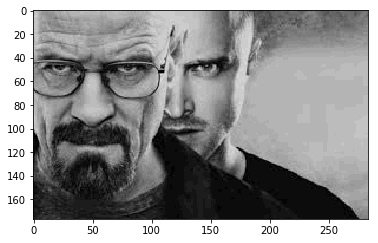

In [46]:

img = Image.open('download.jpg')
img_array= np.asarray(img)
b=img_quantization(32,img_array)
image2 = Image.fromarray(b)
plt.imshow(image2)

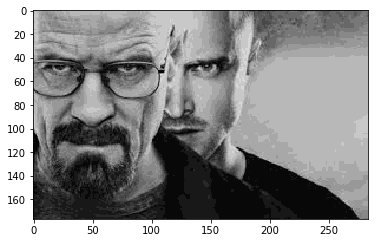

In [47]:
img = Image.open('download.jpg')
img_array= np.asarray(img)
c=img_quantization(16,img_array)
image2 = Image.fromarray(c)
plt.imshow(image2)

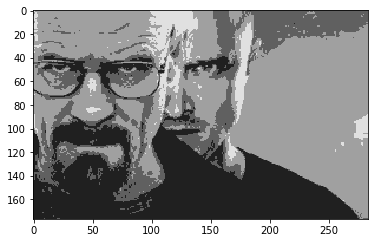

In [48]:
img = Image.open('download.jpg')
img_array= np.asarray(img)
d=img_quantization(4,img_array)
image2 = Image.fromarray(d)
plt.imshow(image2)

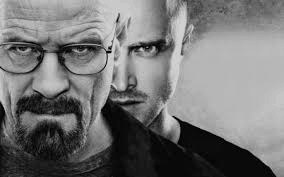

In [40]:
img_64 = img.quantize(colors=64)
img_64

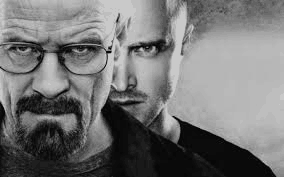

In [41]:
img_32 = img.quantize(colors=32)
img_32

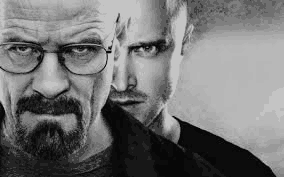

In [42]:
img_16 = img.quantize(colors=16)
img_16

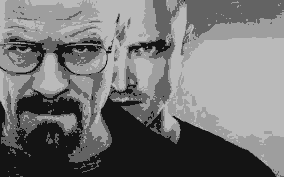

In [43]:
#picture quality has reduced
img_4 = img.quantize(colors=4)
img_4

In [64]:
#Mean square error of a
MSE = np.square(np.subtract(img_array,a)).mean() 
MSE



1.418317816503541

In [65]:
#Mean square error of b
MSE = np.square(np.subtract(img_array,b)).mean() 
MSE

5.590673987427389

In [66]:
#Mean square error of c
MSE = np.square(np.subtract(img_array,c)).mean() 
MSE

18.519774011299436

In [67]:
#Mean square error of a
MSE = np.square(np.subtract(img_array,d)).mean() 
MSE

100.7777512532824

In [30]:
img1 = cv2.imread('download.jpg', 1) 
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
bw_img = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)[1]

[[24. 23. 22. ...  0.  0.  0.]
 [23. 22. 21. ...  0.  0.  0.]
 [22. 21. 20. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2.  2.  2.]
 [ 0.  0.  0. ...  1.  1.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]]


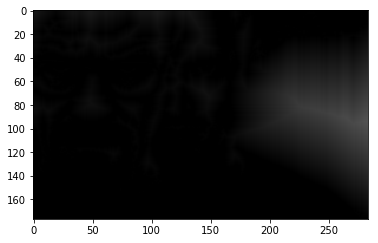

In [34]:
# a) Euclidean distance
dst_euc = cv2.distanceTransform(bw_img,cv2.DIST_L1, 3)
print(dst_euc)
image2 = Image.fromarray(dst_euc)
plt.imshow(image2)


[[16.972229   16.017227   15.062225   ...  0.          0.
   0.        ]
 [16.557938   15.602936   14.647934   ...  0.          0.
   0.        ]
 [16.143646   15.188644   14.233643   ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.9100037   1.9100037
   1.9100037 ]
 [ 0.          0.          0.         ...  0.95500183  0.95500183
   0.95500183]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


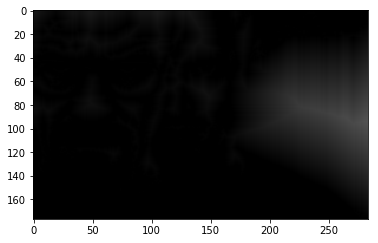

In [35]:
# b) City- block distance
dst_cb = cv2.distanceTransform(bw_img,cv2.DIST_L2, 3)
print(dst_cb)
image2 = Image.fromarray(dst_euc)
plt.imshow(image2)

[[13. 12. 11. ...  0.  0.  0.]
 [13. 12. 11. ...  0.  0.  0.]
 [13. 12. 11. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2.  2.  2.]
 [ 0.  0.  0. ...  1.  1.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]]


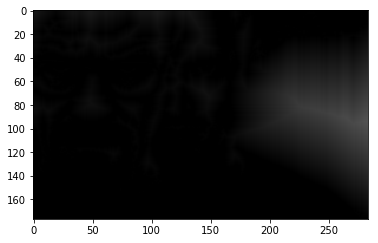

In [36]:
# c) chessboard distance
dst_chess = cv2.distanceTransform(bw_img,cv2.DIST_C, 3)
print(dst_chess)
image2 = Image.fromarray(dst_euc)
plt.imshow(image2)

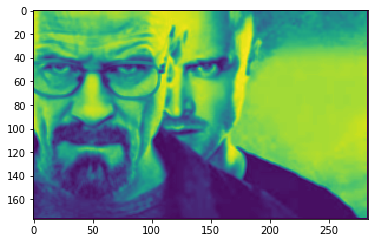

In [38]:
import cv2 
import numpy as np 
   
img = cv2.imread('download.jpg', 0) 
m, n = img.shape 
mask = np.ones([3, 3], dtype = int) 
mask = mask / 9
img_new = np.zeros([m, n])   
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
         
        img_new[i, j]= temp 
          
img_new = img_new.astype(np.uint8) 
cv2.imwrite('blurred.tif', img_new)
plt.imshow(img_new)